In [19]:
from bs4 import BeautifulSoup

# Open and read the local HTML file
with open('advertisers_using_your_activity_or_information.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find all rows in the table (you can adjust the selector if needed)
rows = soup.find_all('tr', class_='_1isx')
companies = []
# Iterate over each row to extract the data
for row in rows:
    # Extract the company name
    company_name = row.find('strong').text.strip() if row.find('strong') else "N/A"
    # Print or store the data as needed
    companies.append(company_name)
    print(f"Company: {company_name}")


Company: Hope Macaulay
Company: i.am.gia
Company: YG Collection
Company: Uber
Company: Mimya
Company: maje.ua
Company: Semiko
Company: TULA
Company: PetSafe Brand
Company: Nakış Sepeti
Company: Shtëpia e Modës BLINI
Company: Wavemaker Canada
Company: ahahahaha
Company: Sazerac, Inc.
Company: Adl
Company: Eyyo Wholesale
Company: Roela Meka
Company: Epiyes
Company: Shopify: aada93 1719634730 business
Company: shantibanaras
Company: Deep - Sedat Bey
Company: Reiss
Company: P.E Nation
Company: Channel 5
Company: Sapiegos Klinika - Lazerinės Dermatologijos Klinika
Company: Marbl.
Company: Melto LLC
Company: Soft coton
Company: didi
Company: Shop Priceless
Company: MNA Manken
Company: Retrofête
Company: Etsy
Company: 42 Vienna
Company: Stuart Weitzman
Company: Goldenpoint
Company: MECCA
Company: Printella Cyfrowa Drukarnia Tkanin
Company: WearWellWoman
Company: Walid dz
Company: Quay Australia
Company: L'OCCITANE en Provence
Company: Pabst Theater Group
Company: The Stay Boulevard Nisantasi


In [20]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# List of extracted topics (advertisers/companies)
advertisers = companies.copy()  # Assuming companies is already defined

# Step 1: Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 2: Encode the topics into semantic embeddings (dense vectors)
embeddings = model.encode(advertisers, show_progress_bar=True)

# Step 3: Apply K-Means Clustering
num_clusters = 7  # You can adjust the number of clusters based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

# Step 4: Prepare data for visualization
df = pd.DataFrame({"Topic": advertisers, "Cluster": kmeans.labels_})

# Step 5: Reduce dimensionality using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Add t-SNE results to the dataframe
df['TSNE-1'] = tsne_results[:, 0]
df['TSNE-2'] = tsne_results[:, 1]

# Step 6: Compute the centroid of each cluster
centroids = kmeans.cluster_centers_

# Step 7: Find the most similar topics to the centroids (main meaning)
for i in range(num_clusters):
    # Get the centroid of the cluster
    centroid = centroids[i].reshape(1, -1)
    
    # Compute cosine similarities between the centroid and all the topics
    cluster_topics = np.array(advertisers)[df['Cluster'] == i]
    cluster_embeddings = embeddings[df['Cluster'] == i]
    
    similarities = cosine_similarity(centroid, cluster_embeddings)
    
    # Get the index of the most similar topic (highest cosine similarity)
    most_similar_idx = np.argmax(similarities)
    most_similar_topic = cluster_topics[most_similar_idx]
    
    # Print the main meaning (most similar topic) of each cluster
    print(f"Cluster {i + 1} main meaning: {most_similar_topic}")


Batches: 100%|██████████| 51/51 [00:00<00:00, 87.91it/s]


Cluster 1 main meaning: Shelf Inc.
Cluster 2 main meaning: BOSS
Cluster 3 main meaning: Fashion Nova
Cluster 4 main meaning: Sperlari Italia
Cluster 5 main meaning: Sony Music Entertainment
Cluster 6 main meaning: Dodona Avdiu
Cluster 7 main meaning: Saranglinee İşletme Hesabı


/Users/tansylu/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tansylu/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tansylu/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tansylu/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tansylu/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarni

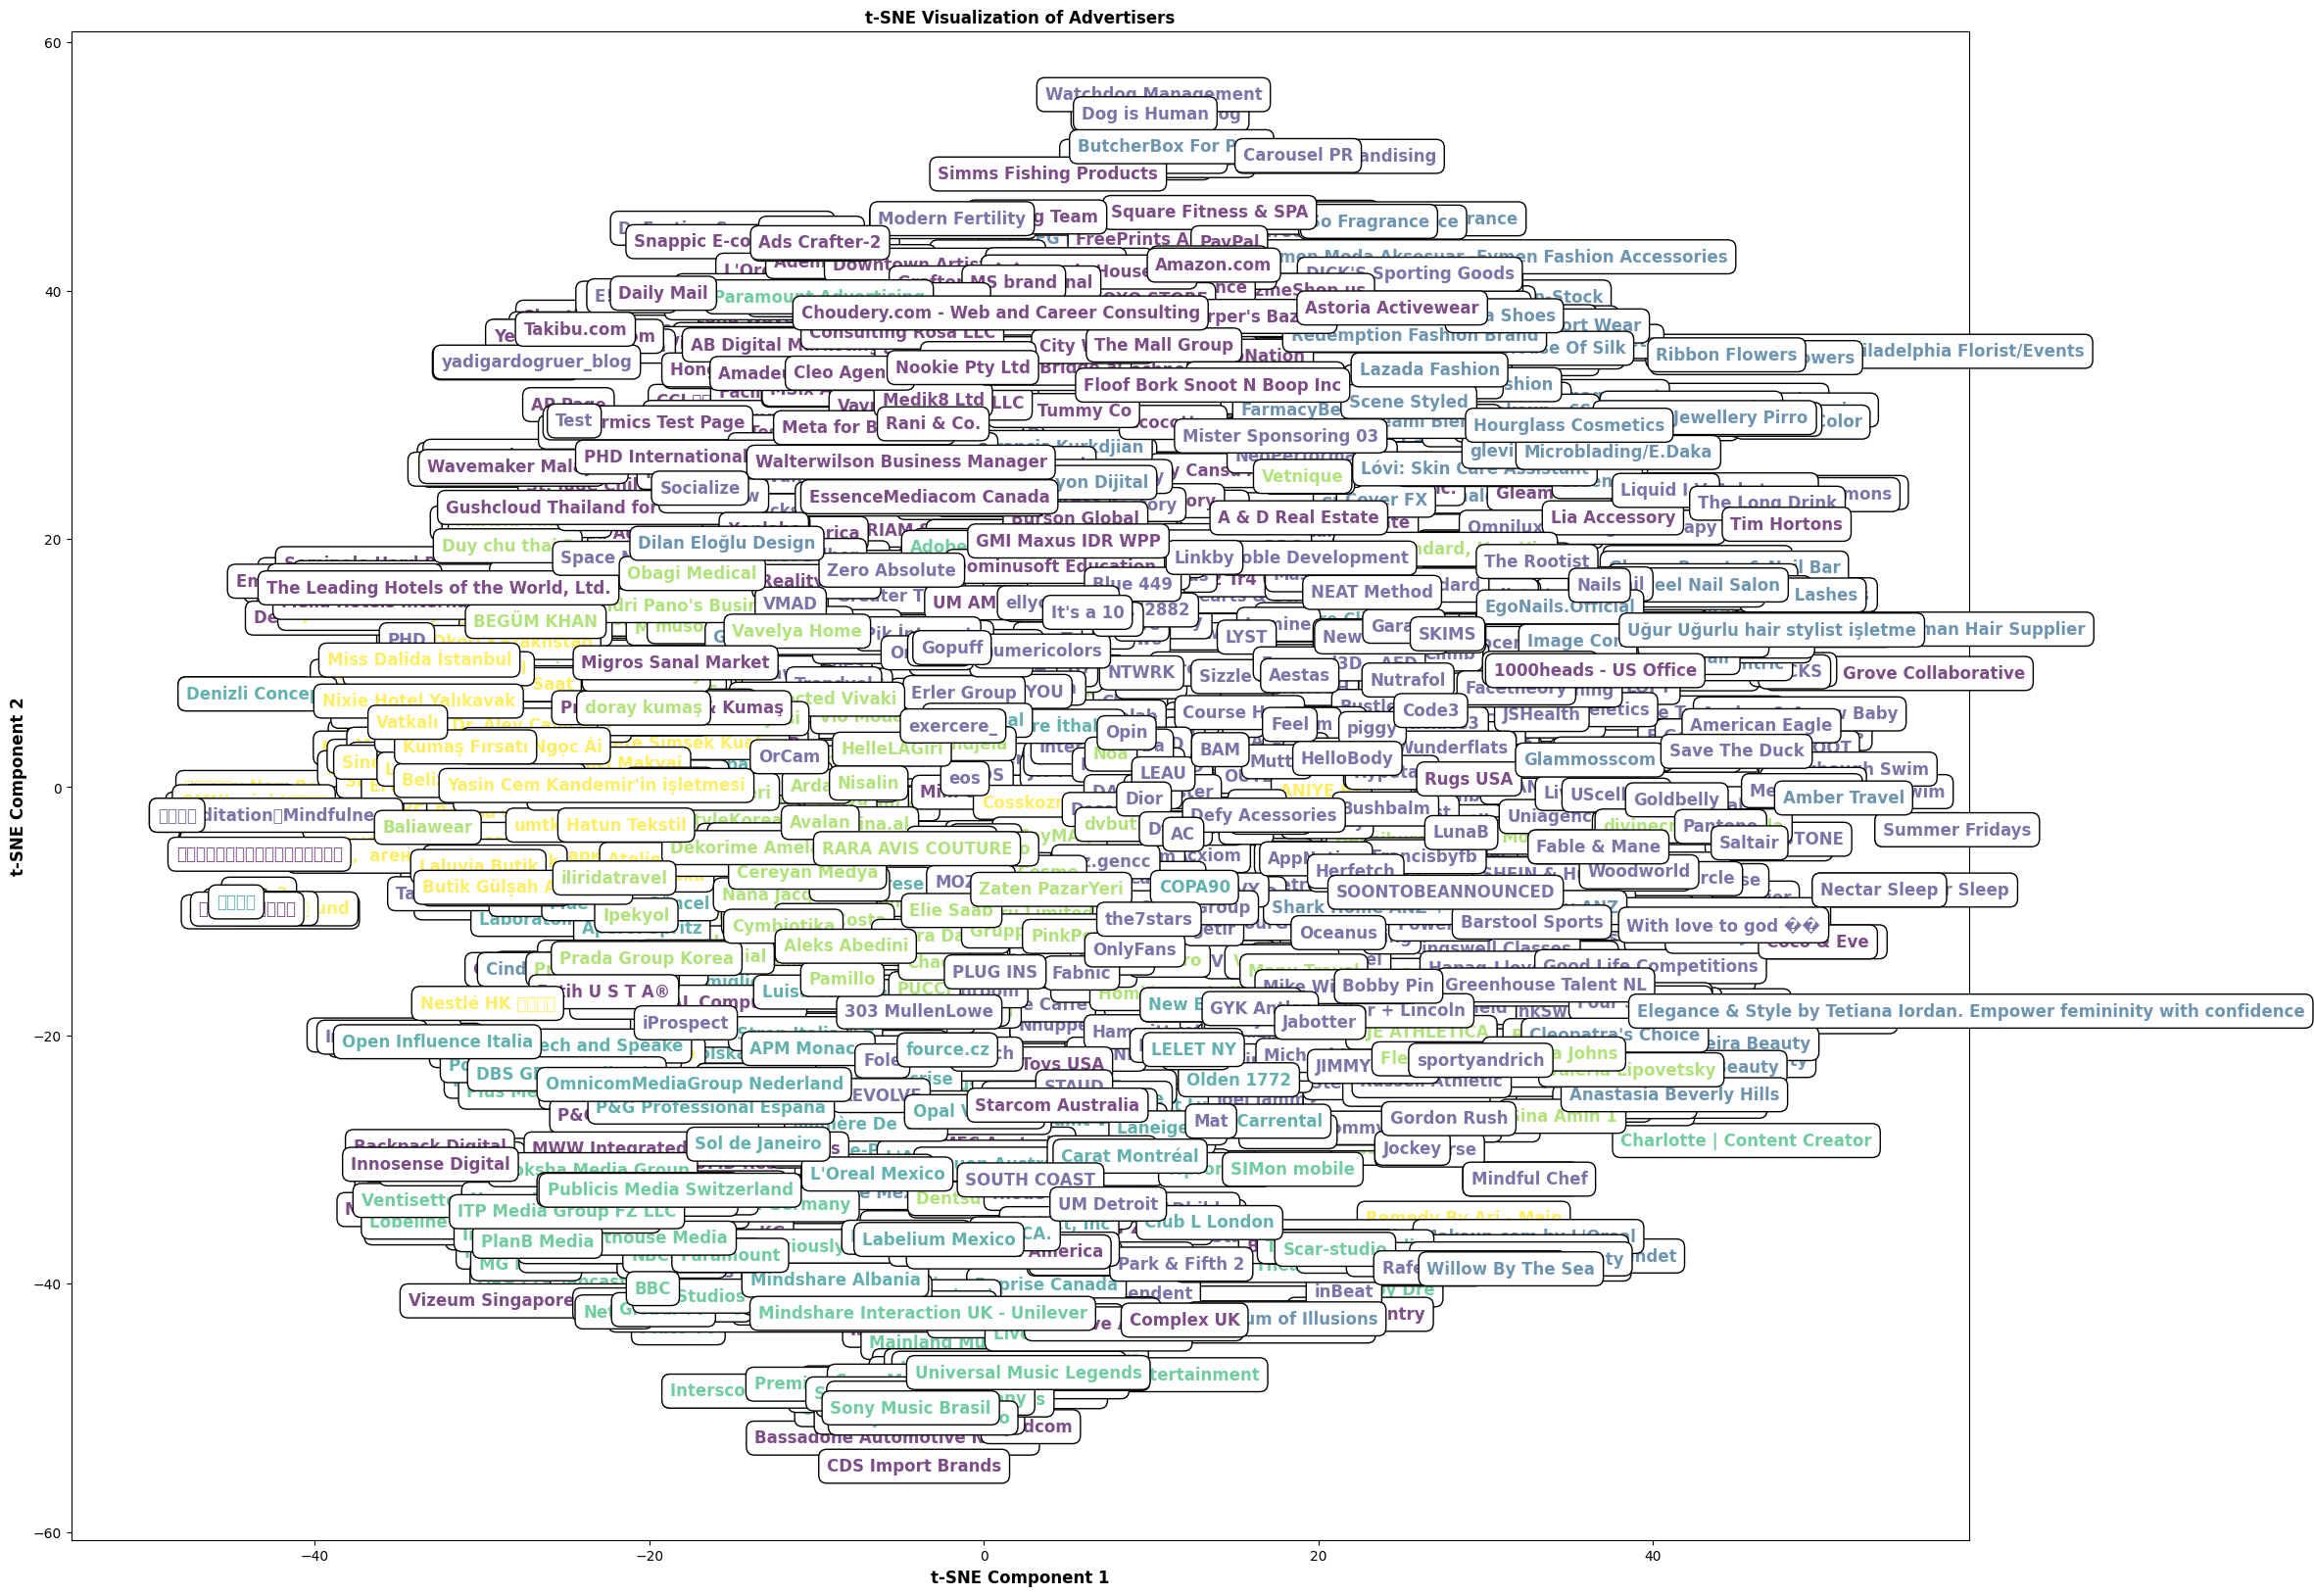

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))
scatter = plt.scatter(df['TSNE-1'], df['TSNE-2'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)

# Annotate the points with topic names and add an offset to the labels
offset_x = 0.15  # Adjust horizontal offset to move to the right
offset_y = 0.1  # Adjust vertical offset
for i in range(df.shape[0]):
    cluster = df['Cluster'][i]  # Get the cluster of the current topic
    # Get the color corresponding to the cluster
    cluster_color = scatter.cmap(scatter.norm(cluster))
    
    # Annotate with the background color corresponding to the cluster
    plt.annotate(df['Topic'][i], 
                 (df['TSNE-1'][i], df['TSNE-2'][i]), 
                 fontsize=12,    # Increase font size
                 fontweight='bold',  # Make text bold
                 alpha=0.7,
                    color=cluster_color,  # Set text color to match cluster color
                 xytext=(offset_x, offset_y),  # Offset label position
                 textcoords='offset points',
                 bbox=dict(facecolor='white', boxstyle='round,pad=0.5'))  # Add background color

# Add title and labels with larger and bolder font
plt.title("t-SNE Visualization of Advertisers", fontsize=12, fontweight='bold')
plt.xlabel("t-SNE Component 1", fontsize=12, fontweight='bold')
plt.ylabel("t-SNE Component 2", fontsize=12, fontweight='bold')
plt.show()
